<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Transfer%C3%AAncias_Banc%C3%A1rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='GREY'> Detecção de Fraude em Transferências Bancárias</font>



![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJBs0VgOyUFFSnB5ORdhFUsQAXo95WAYd3iw&usqp=CAU)

![alt text](https://mfaas.com/resources/wp-content/uploads/In-app-Event-Fraud.gif)
![alt text](https://i.pinimg.com/originals/ad/63/67/ad6367c47eebf1baeb5af6c160ce8366.gif)

###"Golpe em dados bancários pela internet **cresceu 43%** no Brasil"
https://economia.ig.com.br/2020-07-28/golpe-em-dados-bancarios-pela-internet-cresceu-43-no-brasil-saiba-se-proteger.html

# 1° Qual o Problema de Negócio

Esse conjunto de dados fictício possui transações de transferências entre contas de uma mesma Instituição Financeira. São mais de 200 mil registros de transferências, sendo 490 Fraudulentas, ou seja, não foram realizadas pelo dono da conta corrente. Temos 28 variáveis explicativas e a variável Classe é o Target e assume o valor 1 em caso de fraude e 0 em caso contrário.



# 2° Análise Exploratória dos Dados

In [1]:
# Bibliotecas utilizadas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas utilizadas no Pré-Processamento dos Dados
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Bibliotecas utilizadas na Construção de Máquinas Preditivas
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Bibliotecas utilizadas na Avaliação das Máquinas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score




In [2]:
# Lendo os Dados
df = pd.read_csv('/content/transferencias.csv')

In [3]:
# Informações dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        3973 non-null   int64  
 1   pais             3973 non-null   float64
 2   cidade           3973 non-null   float64
 3   bairro           3973 non-null   float64
 4   cep              3973 non-null   float64
 5   ip               3973 non-null   float64
 6   dia              3973 non-null   float64
 7   hora             3973 non-null   float64
 8   minuto           3973 non-null   float64
 9   so               3973 non-null   float64
 10  valor            3973 non-null   float64
 11  antecedentes     3973 non-null   float64
 12  reclamacoes      3973 non-null   float64
 13  qtd_trans        3973 non-null   float64
 14  crt              3973 non-null   float64
 15  limite_global    3972 non-null   float64
 16  tipo_crt         3972 non-null   float64
 17  estabeleciment

In [4]:
# Visualizando algumas linhas
df.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# Verificando valores missing
# (verificar linhas duplicadas)
df.isna().sum()

Timestamp          0
pais               0
cidade             0
bairro             0
cep                0
ip                 0
dia                0
hora               0
minuto             0
so                 0
valor              0
antecedentes       0
reclamacoes        0
qtd_trans          0
crt                0
limite_global      1
tipo_crt           1
estabelecimento    1
contas             1
emprestimos        1
navegador          1
android            1
ios                1
compras            1
hist_navegacao     1
relacionamento     1
ind_seguranca      1
tempo_transacao    1
lim_crt            1
hist_saldo         1
Target             1
dtype: int64

In [6]:
# Eliminando os valores missing
df.dropna(inplace=True) 

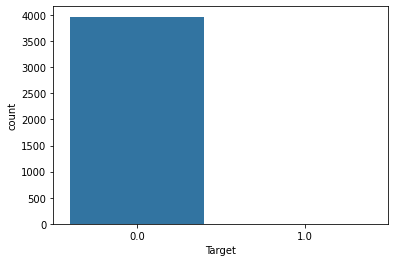

In [7]:
# Dando uma olhada na variável Target
df['Target'].value_counts()
sns.countplot(df['Target'])

In [8]:
# Explorando as correlações com o Target
df.corr()['Target'].sort_values(ascending=False)

Target             1.000000
cep                0.049523
navegador          0.040693
compras            0.029490
contas             0.029418
antecedentes       0.028237
limite_global      0.023122
hist_saldo         0.020957
android            0.015182
minuto             0.012711
ios                0.009997
emprestimos        0.009215
ip                 0.008328
qtd_trans          0.004605
relacionamento     0.003698
ind_seguranca      0.001286
hist_navegacao    -0.000591
tempo_transacao   -0.002574
tipo_crt          -0.002649
lim_crt           -0.004981
cidade            -0.017326
dia               -0.022654
bairro            -0.025113
hora              -0.025777
Timestamp         -0.026490
estabelecimento   -0.032583
so                -0.038498
pais              -0.038919
valor             -0.039520
reclamacoes       -0.068039
crt               -0.085663
Name: Target, dtype: float64

In [9]:
df.corr(method='spearman')

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
Timestamp,1.000000,-0.028492,0.057477,-0.017228,-0.122649,0.046288,-0.047727,0.090197,-0.002540,0.085769,...,0.098332,0.121272,-0.100263,0.031266,-0.038629,-0.130219,0.094234,-0.022197,-0.122408,-0.027478
pais,-0.028492,1.000000,-0.428826,-0.350253,0.147296,-0.180657,-0.052823,-0.254229,-0.080314,-0.057179,...,-0.077623,-0.077307,-0.053324,0.003703,0.408446,-0.040945,-0.146190,-0.019250,-0.067098,-0.035118
cidade,0.057477,-0.428826,1.000000,0.107837,0.016803,0.305387,-0.096633,0.431040,-0.084548,-0.086254,...,-0.069872,-0.067634,0.013276,-0.001338,-0.334313,-0.072156,0.289299,0.097664,-0.450932,-0.000959
bairro,-0.017228,-0.350253,0.107837,1.000000,0.135881,-0.051416,0.030781,0.142535,-0.031632,-0.020147,...,0.075948,0.267557,-0.023977,0.046744,-0.378318,0.047197,-0.001493,-0.022809,0.067973,-0.015317
cep,-0.122649,0.147296,0.016803,0.135881,1.000000,-0.117313,0.209093,-0.169725,0.099060,-0.230996,...,-0.036566,-0.029544,0.160490,-0.033197,0.062046,0.046810,-0.174438,0.071422,0.179052,0.036370
ip,0.046288,-0.180657,0.305387,-0.051416,-0.117313,1.000000,0.077380,0.395165,-0.034751,-0.062775,...,-0.050258,-0.015064,-0.197858,-0.133840,-0.097353,-0.220841,0.122683,-0.143167,-0.380267,0.007272
dia,-0.047727,-0.052823,-0.096633,0.030781,0.209093,0.077380,1.000000,-0.300355,0.441013,-0.006109,...,0.033796,0.019769,-0.064979,-0.244360,0.061485,0.101389,-0.004258,-0.009811,0.267365,-0.033219
hora,0.090197,-0.254229,0.431040,0.142535,-0.169725,0.395165,-0.300355,1.000000,-0.418469,-0.018176,...,-0.037575,0.136917,-0.190494,0.027111,-0.269241,-0.236196,0.059235,-0.132686,-0.136951,-0.015944
minuto,-0.002540,-0.080314,-0.084548,-0.031632,0.099060,-0.034751,0.441013,-0.418469,1.000000,-0.070583,...,-0.031591,-0.029809,0.118957,-0.085505,-0.018730,0.165062,0.148826,0.167223,0.062486,0.014456
so,0.085769,-0.057179,-0.086254,-0.020147,-0.230996,-0.062775,-0.006109,-0.018176,-0.070583,1.000000,...,0.014803,0.142419,-0.193904,0.030642,0.141202,-0.077898,0.117370,-0.154549,-0.120683,-0.025252


In [10]:
# Estatísticas descritivas das variáveis
df.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.224320,-0.333640,0.308476,0.836894,0.013009,-0.029243,0.052876,0.146726,-0.071273,0.055417,...,0.010574,-0.082815,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.217141,1.352136,1.180507,0.981122,1.418904,1.207777,1.286769,1.090854,1.294801,0.918921,...,0.855909,0.635547,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030830,-0.155758,0.287084,-0.908489,-0.573860,-0.735939,-0.278836,-0.205378,-0.474080,...,-0.211797,-0.512547,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451438,0.409390,0.884228,0.099491,-0.090452,-0.209928,0.162196,0.028901,0.031868,...,-0.053211,-0.064375,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2524.500000,1.070629,0.920877,1.433776,0.982710,0.396756,0.449680,0.634358,0.299371,0.620945,...,0.102520,0.345393,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3623.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


# 3° Pré-Processamento dos dados

* Há desbalanceamento da classe (target)?

* Também pode ser complicado lidar com outliers se não entendermos o domínio e o contexto do problema o suficiente.



In [11]:
# Separando os dados para treinamento e teste da máquina preditiva
X = df.drop(['Target'], axis=1)
y = df['Target']


In [12]:
#Balanceamento da Classe (Target)
smt = SMOTE()

In [ ]:
X, y = smt.fit_sample(X, y)

In [ ]:
#Contagem do target depois do smote. Obs: Antes da contagem, para usar a função bincount, precisei converter de float para inteiro
yi = y.astype(int)
np.bincount(yi)

array([284315, 284315])

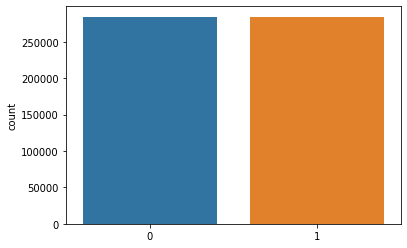

In [ ]:
ax = sns.countplot(x=yi)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y) 

# 4° Criando a Máquina Preditiva de Detecção de Fraude

#XGBoost

* Criamos a Máquina Preditiva e ajustamos o modelo aos dados que preparamos para o treinamento.

* Em seguida, procedemos à classificação com os dados que preparamos para avaliação.

* Por último, avaliamos o desempenho do modelo com as principais métricas de classificação.

In [ ]:
# Construindo o Modelo
from xgboost import XGBClassifier
model = XGBClassifier()

In [ ]:
# Treinando o Modelo
# Demora alguns minutinhos
model = model.fit(X_train, y_train)
model

In [ ]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = model.predict(X_val)


## 5° Avaliando a Máquina Preditiva

In [ ]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

In [ ]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
#0.98684  F1 99%
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

#LightGBM

In [ ]:
# Light GBM
train_data=lgb.Dataset(X_train,label=y_train)
#setting parameters for lightgbm
param = {'num_leaves':1000,         #número de folhas em uma árvore; padrão = 31; type = int
         'objective':'binary',     
         'max_depth':7,
         'learning_rate':.01,
         'max_bin':200}

param['metric'] = ['auc', 'binary_logloss']

#training our model using light gbm
num_round=50

lgbm=lgb.train(param,train_data,num_round)



In [ ]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = lgbm.predict(X_val)

## 5° Avaliando a Máquina Preditiva

In [ ]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

,Gabarito,Previsoes_da_Máquina
0,0,0.304927
1,1,0.696817
2,0,0.344381
3,0,0.304927
4,1,0.696817
...,...,...
170584,0,0.313116
170585,0,0.304927
170586,1,0.696817
170587,0,0.304927


In [ ]:
y_predict.size

170589

In [ ]:
#converting probabilities into 0 or 1
for i in range(0,170589):
    if y_predict[i]>=.5:       # setting threshold to .5
       y_predict[i]=1
    else:  
       y_predict[i]=0

In [ ]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
#0.9843  F1 98%
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

# Random Forest

In [ ]:
# Construindo o Modelo
model = RandomForestClassifier()


In [ ]:
# Treinando o Modelo
# Demora alguns minutinhos
model = model.fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Passando novos dados (dados de teste) Para o modelo
y_predict = model.predict(X_val)


## 5° Avaliando a Máquina Preditiva

In [ ]:
# Comparando gabarito e Previsoes_da_Máquina
gabarito = pd.DataFrame({'Gabarito': y_val,'Previsoes_da_Máquina': y_predict})
gabarito

In [ ]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))

### **Resumão**

* Geração de Hipóteses é muito importante para o sucesso do Projeto de Ciência de Dados
* O tratamento de classes desbalanceadas é fundamental para a assertividade da Máquina Preditiva
* Às vezes, Menos é Mais. O Random forest bateu XGB e LGBM.
